# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import random
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output Data File (CSV)
city_data_df = "output_data/cities.csv"

In [2]:
#NUM_POINTS = 50    # DEBUG 1500

# BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord'] ['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

  # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | afaahiti
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | timaru
Processing Record 8 of Set 1 | tralee
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | sorong
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | hancheng
Processing Record 22 of Set 1 | 

Processing Record 41 of Set 4 | norilsk
Processing Record 42 of Set 4 | borogontsy
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | susuman
Processing Record 45 of Set 4 | vorgashor
Processing Record 46 of Set 4 | piracuruca
Processing Record 47 of Set 4 | harper
Processing Record 48 of Set 4 | nantucket
Processing Record 49 of Set 4 | baranchinskiy
Processing Record 0 of Set 5 | necochea
Processing Record 1 of Set 5 | ahmadpur east
Processing Record 2 of Set 5 | olinda
Processing Record 3 of Set 5 | aasiaat
Processing Record 4 of Set 5 | tuapse
Processing Record 5 of Set 5 | porto novo
Processing Record 6 of Set 5 | new yekepa
Processing Record 7 of Set 5 | laascaanood
Processing Record 8 of Set 5 | mana
Processing Record 9 of Set 5 | caleta de carquin
Processing Record 10 of Set 5 | port mathurin
Processing Record 11 of Set 5 | napasar
Processing Record 12 of Set 5 | kingston
Processing Record 13 of Set 5 | ust-nera
Processing Record 14 of Set 5 | zhanaozen
Pr

Processing Record 35 of Set 8 | isla vista
Processing Record 36 of Set 8 | sines
Processing Record 37 of Set 8 | cill airne
Processing Record 38 of Set 8 | arraial do cabo
Processing Record 39 of Set 8 | gadzhiyevo
Processing Record 40 of Set 8 | dom pedrito
Processing Record 41 of Set 8 | nadym
Processing Record 42 of Set 8 | shubarkuduk
Processing Record 43 of Set 8 | charters towers
Processing Record 44 of Set 8 | fisterra
Processing Record 45 of Set 8 | mikhaylovskoye
Processing Record 46 of Set 8 | viedma
Processing Record 47 of Set 8 | vanino
Processing Record 48 of Set 8 | cromer
Processing Record 49 of Set 8 | little cayman
City not found. Skipping...
Processing Record 0 of Set 9 | radviliskis
Processing Record 1 of Set 9 | hobyo
Processing Record 2 of Set 9 | nema
Processing Record 3 of Set 9 | klaksvik
Processing Record 4 of Set 9 | trincomalee
Processing Record 5 of Set 9 | ulaangom
Processing Record 6 of Set 9 | hailey
Processing Record 7 of Set 9 | kiunga
Processing Record

Processing Record 25 of Set 12 | songyuan
Processing Record 26 of Set 12 | zaragoza
Processing Record 27 of Set 12 | la'ie
Processing Record 28 of Set 12 | poulsbo
Processing Record 29 of Set 12 | pritzwalk
Processing Record 30 of Set 12 | coquimbo
Processing Record 31 of Set 12 | north bend
Processing Record 32 of Set 12 | alo
Processing Record 33 of Set 12 | pont rouge
Processing Record 34 of Set 12 | querecotillo
Processing Record 35 of Set 12 | port augusta
Processing Record 36 of Set 12 | salinopolis
Processing Record 37 of Set 12 | menongue
Processing Record 38 of Set 12 | gizo
Processing Record 39 of Set 12 | aranda de duero
Processing Record 40 of Set 12 | katsuren-haebaru
Processing Record 41 of Set 12 | minas de marcona
Processing Record 42 of Set 12 | ulladulla
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,afaahiti,-17.7500,-149.2833,25.93,78,68,4.65,PF,1691348134
1,saipan,15.1355,145.7010,27.39,100,0,0.45,MP,1691348119
2,waitangi,-43.9535,-176.5597,8.94,70,100,5.65,NZ,1691348114
3,whitehorse,60.7161,-135.0538,22.43,46,20,5.66,CA,1691347892
4,longyearbyen,78.2186,15.6401,10.91,76,75,3.60,SJ,1691348141


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,25.93,78,68,4.65,PF,1691348134
1,saipan,15.1355,145.7010,27.39,100,0,0.45,MP,1691348119
2,waitangi,-43.9535,-176.5597,8.94,70,100,5.65,NZ,1691348114
3,whitehorse,60.7161,-135.0538,22.43,46,20,5.66,CA,1691347892
4,longyearbyen,78.2186,15.6401,10.91,76,75,3.60,SJ,1691348141


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

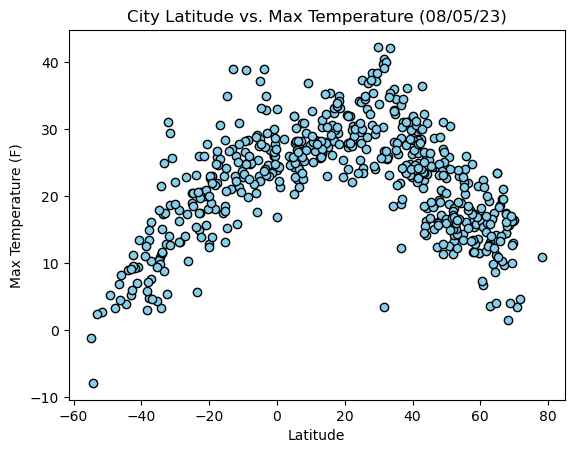

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

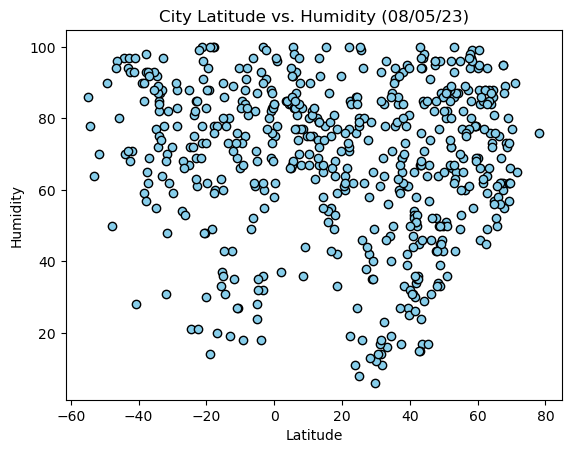

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

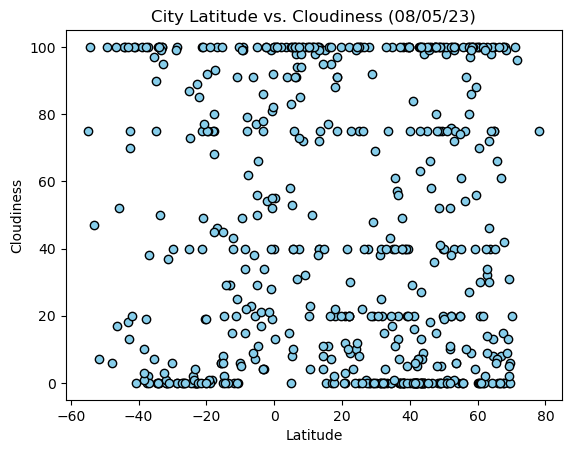

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

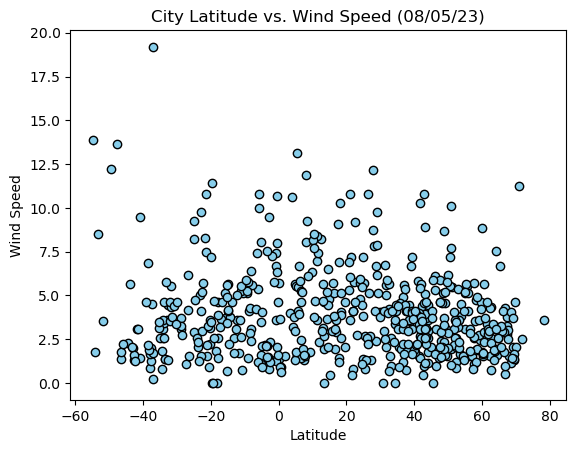

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (08/05/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saipan,15.1355,145.7010,27.39,100,0,0.45,MP,1691348119
3,whitehorse,60.7161,-135.0538,22.43,46,20,5.66,CA,1691347892
4,longyearbyen,78.2186,15.6401,10.91,76,75,3.60,SJ,1691348141
7,tralee,52.2704,-9.7026,15.14,72,20,2.57,IE,1691348120
8,bethel,41.3712,-73.4140,29.75,54,20,1.54,US,1691348083


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,25.93,78,68,4.65,PF,1691348134
2,waitangi,-43.9535,-176.5597,8.94,70,100,5.65,NZ,1691348114
5,mount gambier,-37.8333,140.7667,4.79,93,2,0.84,AU,1691348287
6,timaru,-44.4000,171.2500,3.93,97,100,2.26,NZ,1691348289
9,bredasdorp,-34.5322,20.0403,10.89,92,0,0.78,ZA,1691348139


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.25x + 33.19
The r-squared is: -0.6477914115179477
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


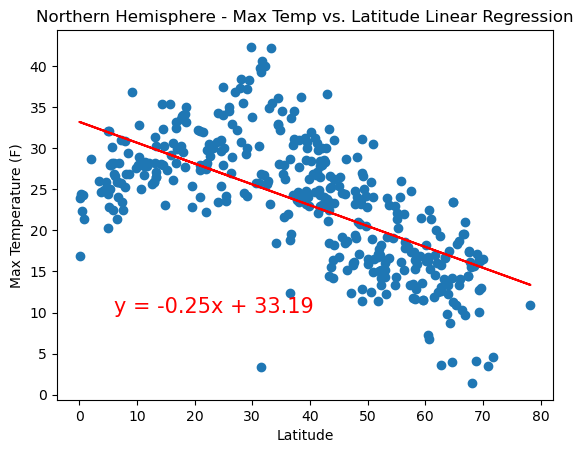

In [21]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.5x + 29.84
The r-squared is: 0.8122289036807346
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


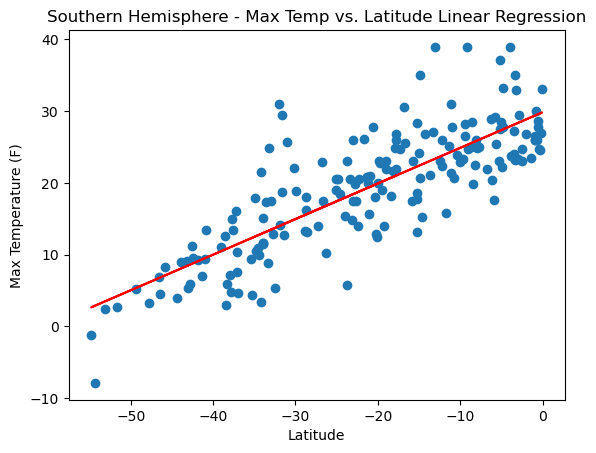

In [43]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.01x + 67.36
The r-squared is: -0.004984143076244765
The regression displays no correlation.


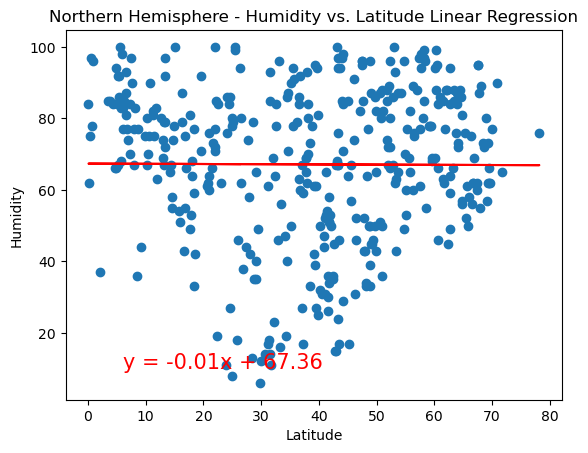

In [28]:
# Northern Hemisphere 
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation.")
#print("In the nothern hemisphere, as you move away from the equator the humidity is fa.")
plt.show()

Regression line equation is: y = -0.3x + 64.68
The r-squared is: -0.1988122804379307
The regression displays a negative correlation.


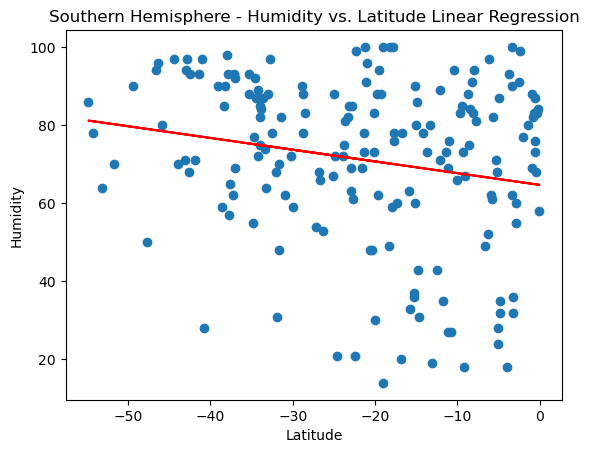

In [44]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

**Discussion about the linear relationship:** There is very little correlation between the southern and norhern hemisphere vs. humidity. There is slightly greater humidity as you get closer to the equator in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.29x + 56.87
The r-squared is: -0.14004740721366352
The regression displays a negative correlation.


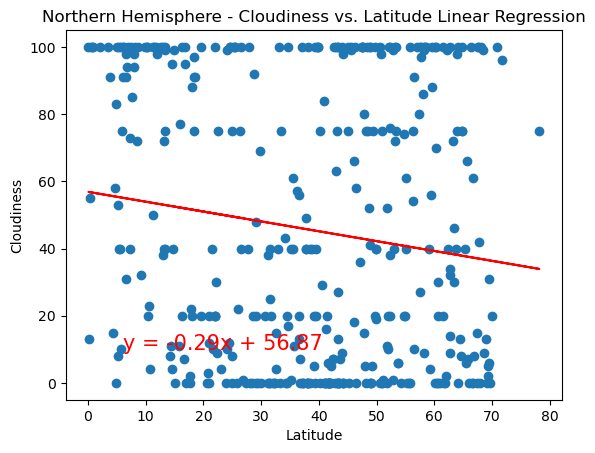

In [36]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

Regression line equation is: y = -0.04x + 42.86
The r-squared is: -0.015260251272594423
The regression displays no correlation.


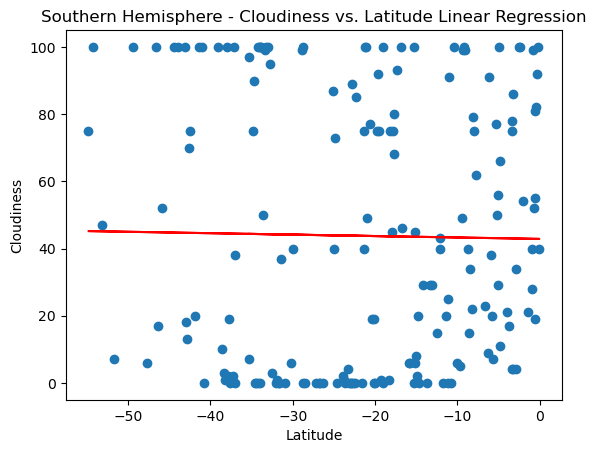

In [35]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation.")
plt.show()

**Discussion about the linear relationship:  There is very little correlation between the southern and norhern hemisphere vs. cloudiness. However, because of the humidity closer to the eqator in the souther hemisphere we do see some more cloud coverage.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.02x + 4.7
The r-squared is: -0.20893578684074798
The regression displays a negative correlation.


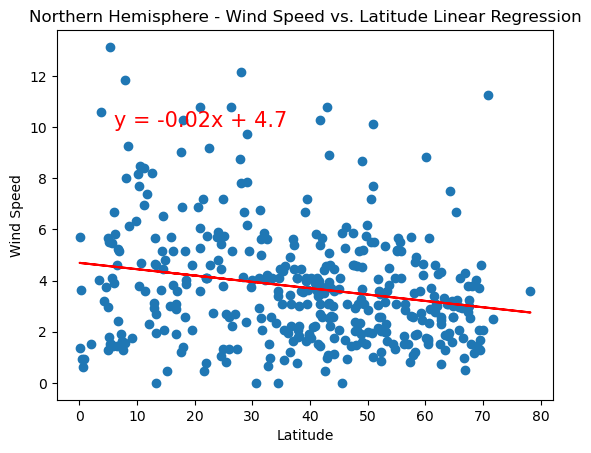

In [37]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
#print("In the nothern hemisphere, as you move away from the equator)
plt.show()

Regression line equation is: y = -0.0x + 3.96
The r-squared is: -0.007457224189865024
The regression displays no correlation.


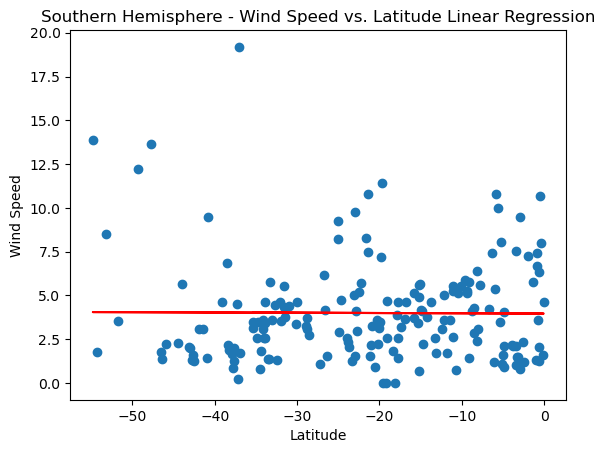

In [39]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays no correlation.")
#print("In the nothern hemisphere, as you move away from the equator the humidity is fa.")
plt.show()

**Discussion about the linear relationship:** The regression does not display much of a correlation between the data sets however, there is much more wind activity the Northern Hemisphere.